# Lasso

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso

##  Simulated data

In [2]:
np.random.seed(1011)
n=1000

df=pd.DataFrame()

df.loc[:,0]=np.random.normal(0, 1, n)
df.loc[:,1]=np.random.normal(0, 2, n)
df.loc[:,2]=np.random.normal(0, 3, n)

df.loc[:,3]=np.random.normal(1, 1, n)
df.loc[:,4]=np.random.normal(1, 2, n)
df.loc[:,5]=np.random.normal(1, 3, n)

df.loc[:,6]=np.random.normal(-1, 1, n)
df.loc[:,7]=np.random.normal(-1, 2, n)
df.loc[:,8]=np.random.normal(-1, 3, n)

for _ in range(len(df)):
    df.loc[_,9]=df.loc[_,0]+np.random.random()

df.loc[:,10]=0
for _ in range(len(df.columns)-1):
    df.loc[:,10]+=(np.random.normal(size=1)*df.loc[:,_])
df.loc[:,10]+=np.random.normal(size=1)

df.columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","Y"]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Y
0,-1.154209,2.431243,-0.059187,1.057514,-1.869898,-1.322794,1.573110,-3.139412,4.615547,-0.629156,-1.595391
1,1.572634,0.348516,2.260547,1.895596,-2.380628,1.160791,-1.451359,0.608004,3.761592,1.627824,3.008723
2,-0.857757,-1.559042,-4.389577,-0.914164,2.961784,3.528390,-0.589836,-2.557053,2.329463,-0.481384,-5.080839
3,0.279814,-0.391867,7.491715,1.312105,-0.358436,-3.844871,-1.964660,1.158029,-3.148936,1.059014,5.115676
4,-0.099409,-1.659896,0.024069,3.021029,-2.903704,-3.431237,-0.013005,1.595715,-2.517096,0.167768,8.258967


In [3]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Y
V1,1.000000,0.011289,0.011366,0.015014,-0.040626,-0.033757,0.013798,-0.042408,-0.034904,0.961254,0.348117
V2,0.011289,1.000000,0.047743,-0.037009,-0.006183,0.028079,-0.029589,-0.027016,-0.017083,0.011179,-0.229360
V3,0.011366,0.047743,1.000000,-0.037847,-0.029982,0.004592,-0.038333,0.005769,-0.007104,0.016456,-0.281285
V4,0.015014,-0.037009,-0.037847,1.000000,0.014471,-0.019414,-0.016943,0.029860,-0.003081,-0.004363,0.005961
V5,-0.040626,-0.006183,-0.029982,0.014471,1.000000,0.023095,-0.000889,0.061484,-0.030440,-0.025893,-0.483536
V6,-0.033757,0.028079,0.004592,-0.019414,0.023095,1.000000,-0.046326,-0.039649,-0.005113,-0.022977,-0.700382
V7,0.013798,-0.029589,-0.038333,-0.016943,-0.000889,-0.046326,1.000000,-0.061712,-0.013593,-0.001122,-0.155499
V8,-0.042408,-0.027016,0.005769,0.029860,0.061484,-0.039649,-0.061712,1.000000,0.033264,-0.052543,0.002368
V9,-0.034904,-0.017083,-0.007104,-0.003081,-0.030440,-0.005113,-0.013593,0.033264,1.000000,-0.047634,-0.125300
V10,0.961254,0.011179,0.016456,-0.004363,-0.025893,-0.022977,-0.001122,-0.052543,-0.047634,1.000000,0.344024


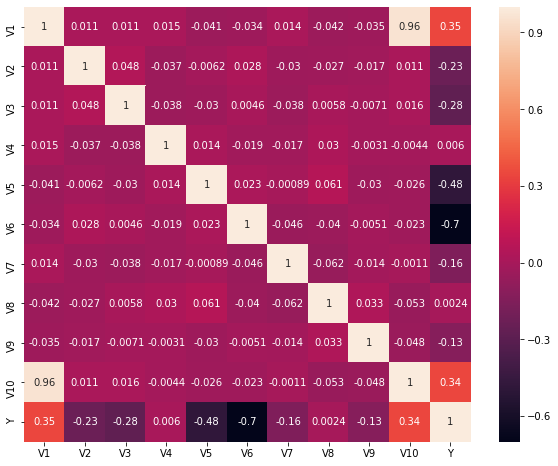

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

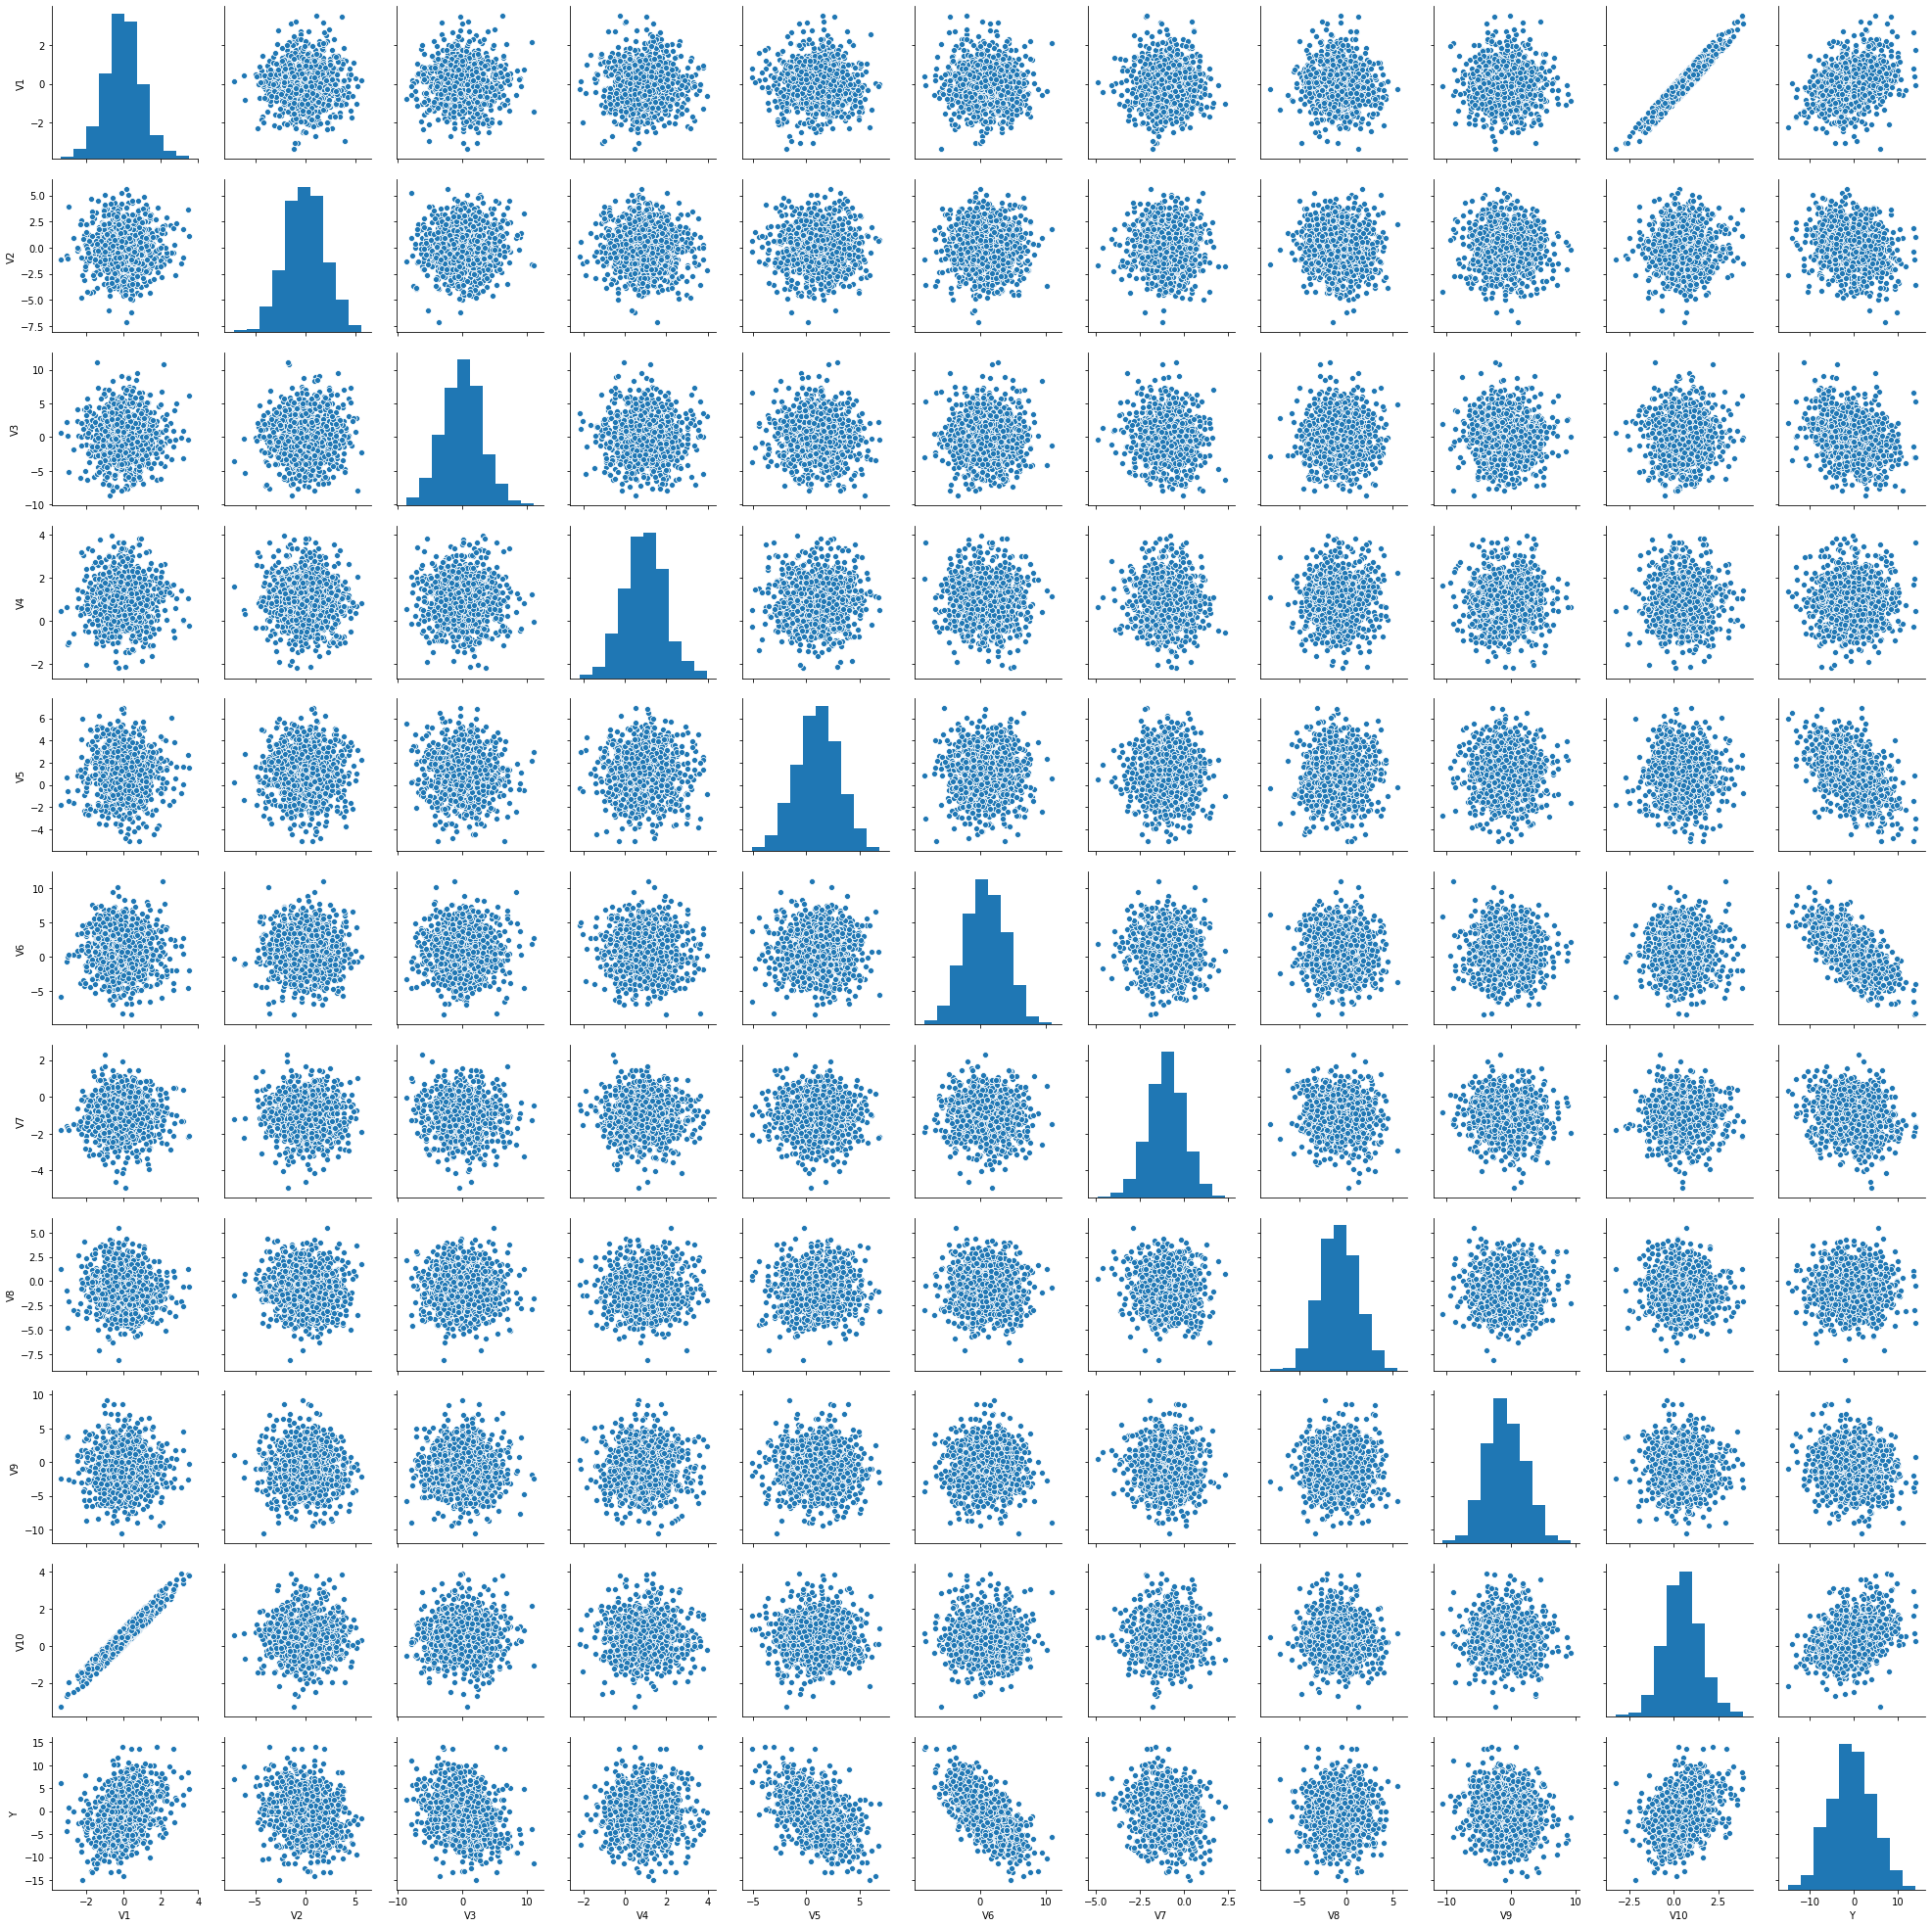

In [5]:
sns.pairplot(df)
plt.show()

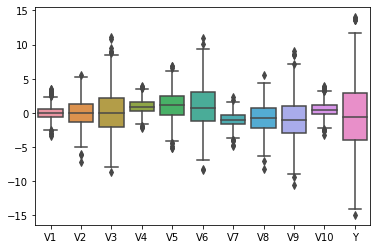

In [6]:
sns.boxplot(data=df)
plt.show()

## train_test_split

In [7]:
X=df.drop('Y', axis=1)
y=df['Y']

In [8]:
lasso=Lasso()

In [9]:
coef=pd.DataFrame(columns=X.columns)
coef

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10


In [10]:
np.random.seed(1011)
for _ in range(n):
    index = np.random.choice(n, 700, replace=False)
    X_train = X.iloc[index]
    y_train = y.iloc[index]
    lasso.fit(X_train,y_train)
    coef.loc[_]=lasso.coef_

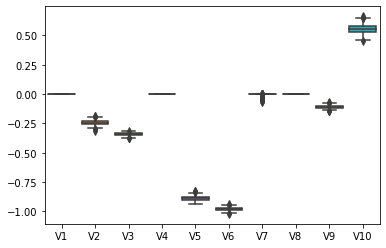

In [11]:
sns.boxplot(data=coef)
plt.show()

## Correlation low

In [12]:
np.random.seed(1011)
n=1000

df=pd.DataFrame()

df.loc[:,0]=np.random.normal(0, 1, n)
df.loc[:,1]=np.random.normal(0, 1, n)
df.loc[:,2]=np.random.normal(0, 1, n)
df.loc[:,3]=np.random.normal(0, 1, n)
df.loc[:,4]=np.random.normal(0, 1, n)

df.loc[:,5]=0
for _ in range(len(df.columns)-1):
    df.loc[:,5]+=(np.random.normal(size=1)*df.loc[:,_])
df.loc[:,5]+=np.random.normal(size=1)

df.columns = ["V1","V2","V3","V4","V5","Y"]
df.head()

,V1,V2,V3,V4,V5,Y
0,-1.154209,1.215621,-0.019729,0.057514,-1.434949,3.713422
1,1.572634,0.174258,0.753516,0.895596,-1.690314,1.221725
2,-0.857757,-0.779521,-1.463192,-1.914164,0.980892,1.776196
3,0.279814,-0.195933,2.497238,0.312105,-0.679218,3.121317
4,-0.099409,-0.829948,0.008023,2.021029,-1.951852,0.402994


In [13]:
df.corr()

,V1,V2,V3,V4,V5,Y
V1,1.000000,0.011289,0.011366,0.015014,-0.040626,-0.286570
V2,0.011289,1.000000,0.047743,-0.037009,-0.006183,0.060978
V3,0.011366,0.047743,1.000000,-0.037847,-0.029982,0.380909
V4,0.015014,-0.037009,-0.037847,1.000000,0.014471,-0.669736
V5,-0.040626,-0.006183,-0.029982,0.014471,1.000000,-0.595847
Y,-0.286570,0.060978,0.380909,-0.669736,-0.595847,1.000000


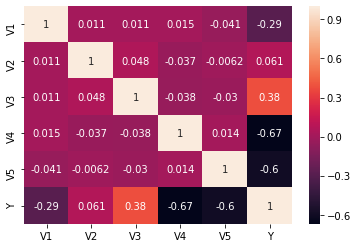

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

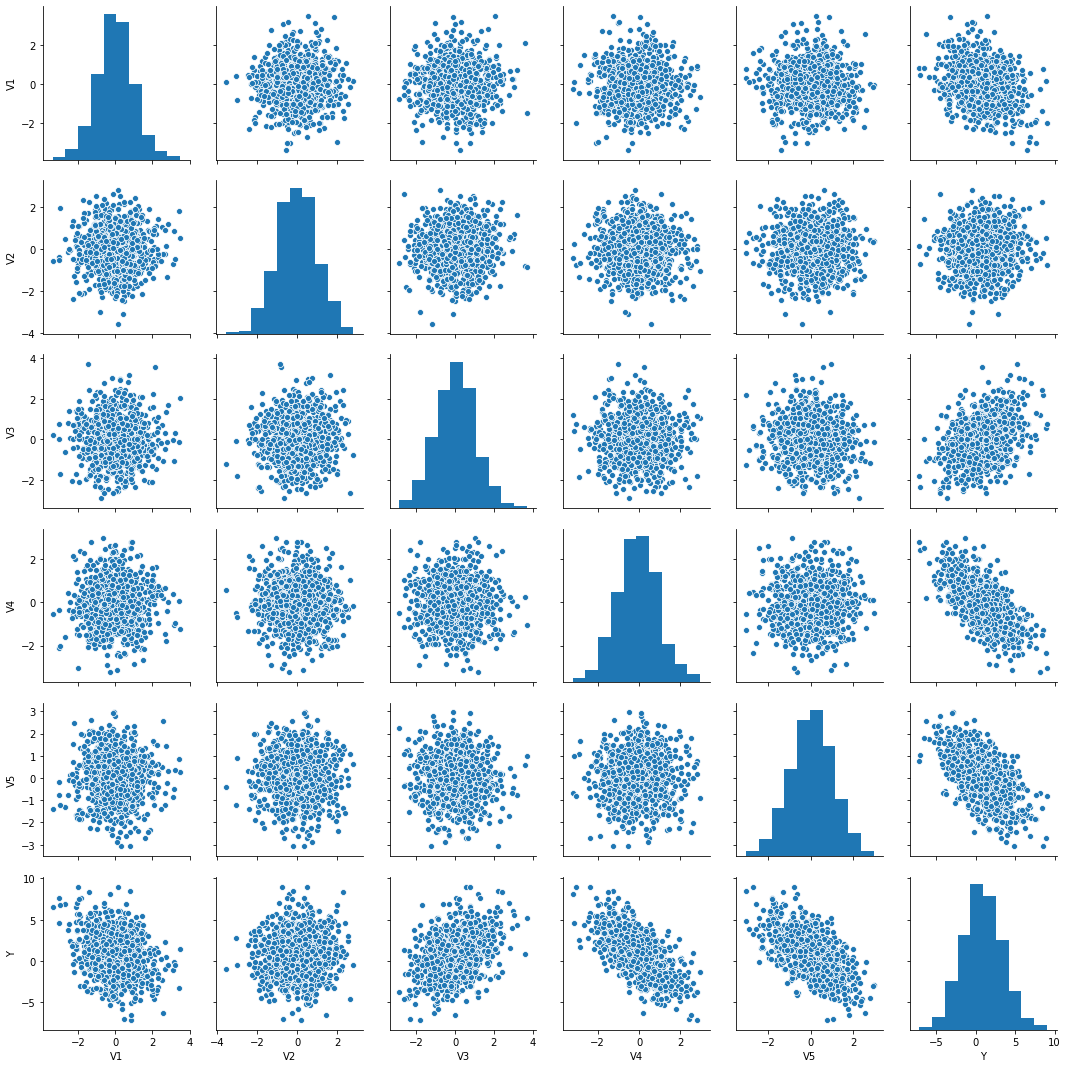

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
X=df.drop('Y', axis=1)
y=df['Y']

lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
coef=pd.DataFrame(columns=X.columns)
np.random.seed(1011)
for _ in range(n):
    index = np.random.choice(n, 100, replace=False)
    X_train = X.iloc[index]
    y_train = y.iloc[index]
    lasso.fit(X_train,y_train)
    coef.loc[_]=lasso.coef_

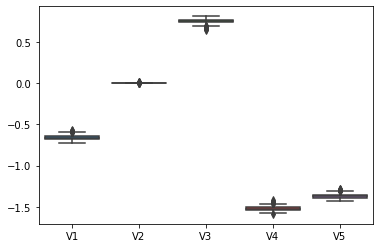

In [17]:
sns.boxplot(data=coef)
plt.show()

## Correlation High

In [18]:
np.random.seed(1011)
n=1000

df=pd.DataFrame()

df.loc[:,0]=np.random.normal(0, 1, n)
df.loc[:,1]=0
df.loc[:,2]=0
df.loc[:,3]=0
df.loc[:,4]=0

for _ in range(len(df)):
    df.loc[_,1]=df.loc[_,0]+np.random.random()
    df.loc[_,2]=df.loc[_,0]+np.random.random()
    df.loc[_,3]=df.loc[_,0]+np.random.random()
    df.loc[_,4]=df.loc[_,0]+np.random.random()


df.loc[:,5]=0
for _ in range(len(df.columns)-1):
    df.loc[:,5]+=(np.random.normal(size=1)*df.loc[:,_])
df.loc[:,5]+=np.random.normal(size=1)

df.columns = ["V1","V2","V3","V4","V5","Y"]
df.head()

,V1,V2,V3,V4,V5,Y
0,-1.154209,-0.605545,-0.314730,-0.757915,-1.066804,0.164051
1,1.572634,2.293550,1.942398,2.442338,1.971189,2.126659
2,-0.857757,-0.734379,-0.466911,-0.060150,0.009552,0.311517
3,0.279814,0.548879,0.327389,0.453413,1.259038,0.340502
4,-0.099409,0.230047,0.441876,0.517992,0.855558,0.634323


In [19]:
df.corr()

,V1,V2,V3,V4,V5,Y
V1,1.000000,0.958551,0.961450,0.962054,0.959610,0.915498
V2,0.958551,1.000000,0.925611,0.923322,0.922684,0.862977
V3,0.961450,0.925611,1.000000,0.924527,0.921140,0.910009
V4,0.962054,0.923322,0.924527,1.000000,0.922988,0.974370
V5,0.959610,0.922684,0.921140,0.922988,1.000000,0.829878
Y,0.915498,0.862977,0.910009,0.974370,0.829878,1.000000


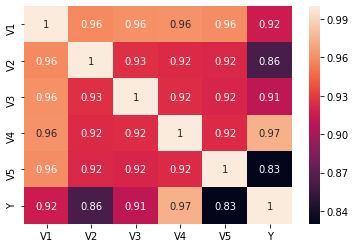

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.show()

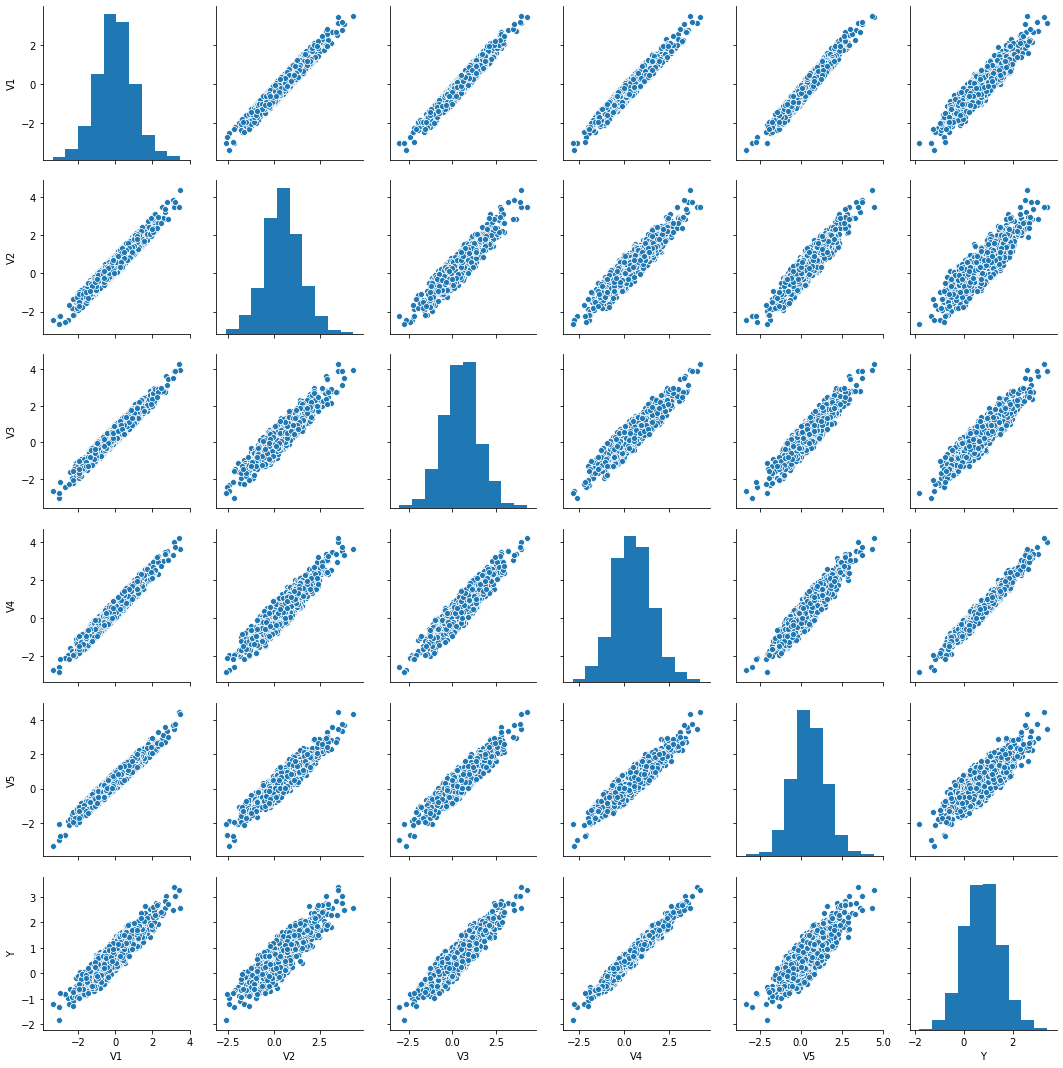

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
X=df.drop('Y', axis=1)
y=df['Y']

lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
coef=pd.DataFrame(columns=X.columns)
np.random.seed(1011)
for _ in range(n):
    index = np.random.choice(n, 100, replace=False)
    X_train = X.iloc[index]
    y_train = y.iloc[index]
    lasso.fit(X_train,y_train)
    coef.loc[_]=lasso.coef_

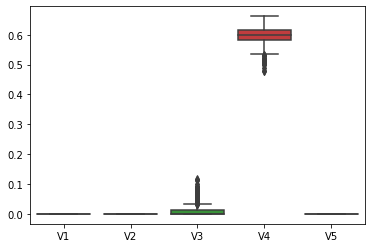

In [23]:
sns.boxplot(data=coef)
plt.show()